In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import scipy

In [2]:
#filepath = 'results/StaticHopper/static_hopper.p'
filepath = 'results/StaticSwimmer/static_swimmer.p'
#filepath = 'results/StaticCheetah/static_cheetah.p'
#filepath = 'results/StaticWalker/static_walker.p'

filtercheck = 0

savename = filepath #filepath to results
if_filtering = bool(filtercheck) #0 for no filtering. 1 for filtering

res_D = pickle.load(open(savename,'rb'))
const_test_rew_summary_static = res_D['zero_test']
rand_test_rew_summary_static = res_D['rand_test']
adv_test_rew_summary_static = res_D['adv_test']

In [14]:
#filepath = 'results/AdvHopper/adv_hopper.p'
filepath = 'results/AdvSwimmer/adv_swimmer_long.p'
#filepath = 'results/AdvCheetah/adv_cheetah.p'
#filepath = 'results/AdvWalker/adv_walker.p'

filtercheck = 0

savename = filepath #filepath to results
if_filtering = bool(filtercheck) #0 for no filtering. 1 for filtering

res_D = pickle.load(open(savename,'rb'))
const_test_rew_summary_dyn = res_D['zero_test']
rand_test_rew_summary_dyn = res_D['rand_test']
adv_test_rew_summary_dyn = res_D['adv_test']

In [4]:
#graph_title = "Hopper"
graph_title = "Swimmer"
#graph_title = "Cheetah"
#graph_title = "Walker"

## Percentile Analysis

In [29]:
final_const_static = []
final_rand_static = []
final_adv_static = []
for experiment in const_test_rew_summary_static:
    final_const_static.append(experiment[len(experiment)-1])
for experiment in rand_test_rew_summary_static:
    final_rand_static.append(experiment[len(experiment)-1])
for experiment in adv_test_rew_summary_static:
    final_adv_static.append(experiment[len(experiment)-1])

In [31]:
final_const_dyn = []
final_rand_dyn = []
final_adv_dyn = []
for experiment in const_test_rew_summary_dyn:
    final_const_dyn.append(experiment[len(experiment)-1])
for experiment in rand_test_rew_summary_dyn:
    final_rand_dyn.append(experiment[len(experiment)-1])
for experiment in adv_test_rew_summary_dyn:
    final_adv_dyn.append(experiment[len(experiment)-1])

In [32]:
print(np.average(final_const_static), np.average(final_rand_static), np.average(final_adv_static))
print(np.std(final_const_static), np.std(final_rand_static), np.std(final_adv_static))

print()
print(np.average(final_const_dyn), np.average(final_rand_dyn), np.average(final_adv_dyn))
print(np.std(final_const_dyn), np.std(final_rand_dyn), np.std(final_adv_dyn))

149.228943073 156.38499571 134.776962894
106.04235106 100.069565642 78.4798941189

178.852296443 179.884395877 149.195575854
121.311791891 119.384049276 106.453042672


In [18]:
final_const_static_sort = np.sort(final_const_static)
final_const_dyn_sort = np.sort(final_const_dyn)

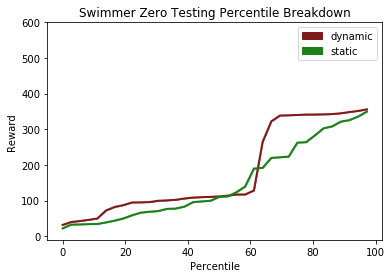

0.502182555372 0.426380822037 0.0758017333354


In [19]:
plot_tests = [[final_const_dyn_sort], [final_const_static_sort]]
plot_names = ['dynamic', 'static']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [100*i/len(mean_con) for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))
    
plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-10,600])
plt.title(graph_title+" Zero Testing Percentile Breakdown")
plt.xlabel('Percentile')
plt.ylabel('Reward')
plt.show()

mean_con = np.array(plot_tests[0]).mean(0)
dynauc = (np.sum(mean_con) / (np.amax(mean_con)*len(mean_con)))
mean_con = np.array(plot_tests[1]).mean(0)
statauc = (np.sum(mean_con) / (np.amax(mean_con)*len(mean_con)))
print(dynauc, statauc, dynauc-statauc)

In [10]:
final_rand_static_sort = np.sort(final_rand_static)
final_rand_dyn_sort = np.sort(final_rand_dyn)

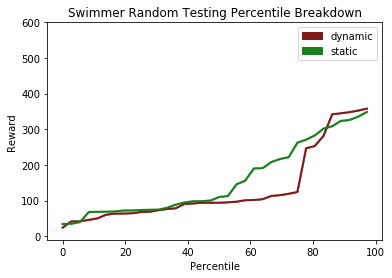

0.371218324066 0.448142373267 -0.0769240492013


In [11]:
plot_tests = [[final_rand_dyn_sort], [final_rand_static_sort]]
plot_names = ['dynamic', 'static']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [100*i/len(mean_con) for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))

plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-10,600])
plt.title(graph_title+" Random Testing Percentile Breakdown")
plt.xlabel('Percentile')
plt.ylabel('Reward')
plt.show()

mean_con = np.array(plot_tests[0]).mean(0)
dynauc = (np.sum(mean_con) / (np.amax(mean_con)*len(mean_con)))
mean_con = np.array(plot_tests[1]).mean(0)
statauc = (np.sum(mean_con) / (np.amax(mean_con)*len(mean_con)))
print(dynauc, statauc, dynauc-statauc)

In [12]:
final_adv_static_sort = np.sort(final_adv_static)
final_adv_dyn_sort = np.sort(final_adv_dyn)

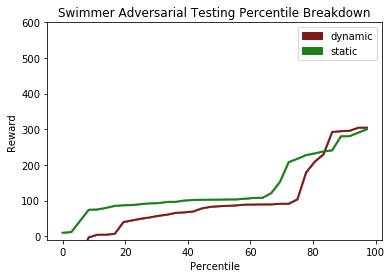

0.318616728385 0.448722501906 -0.130105773521


In [13]:
plot_tests = [[final_adv_dyn_sort], [final_adv_static_sort]]
plot_names = ['dynamic', 'static']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [100*i/len(mean_con) for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))

plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-10,600])
plt.title(graph_title+" Adversarial Testing Percentile Breakdown")
plt.xlabel('Percentile')
plt.ylabel('Reward')
plt.show()

mean_con = np.array(plot_tests[0]).mean(0)
dynauc = (np.sum(mean_con) / (np.amax(mean_con)*len(mean_con)))
mean_con = np.array(plot_tests[1]).mean(0)
statauc = (np.sum(mean_con) / (np.amax(mean_con)*len(mean_con)))
print(dynauc, statauc, dynauc-statauc)

## Graphing

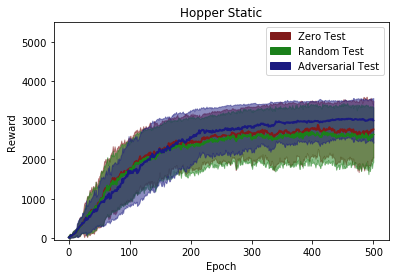

In [16]:
plot_tests = [const_test_rew_summary_static, rand_test_rew_summary_static, adv_test_rew_summary_static]
if(graph_title =="Swimmer"):
    for a in range(len(plot_tests)):
        for b in range(len(plot_tests[a])):
            plot_tests[a][b] = plot_tests[a][b][:200]
plot_names = ['Zero Test', 'Random Test', 'Adversarial Test']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1), (0.1,0.1,0.5)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [i for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))

plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-50,5500])
plt.title(graph_title+" Static")
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.show()

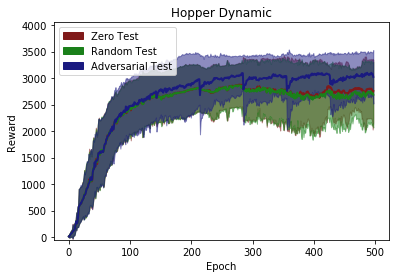

In [17]:
plot_tests = [const_test_rew_summary_dyn, rand_test_rew_summary_dyn, adv_test_rew_summary_dyn]
if(graph_title =="Swimmer"):
    for a in range(len(plot_tests)):
        for b in range(len(plot_tests[a])):
            plot_tests[a][b] = plot_tests[a][b][:200]
plot_names = ['Zero Test', 'Random Test', 'Adversarial Test']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1), (0.1,0.1,0.5)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [i for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))

plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-50,4050])
plt.title(graph_title+" Dynamic")
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.show()

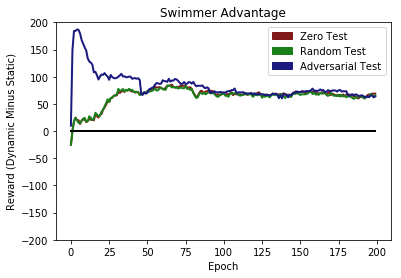

In [20]:
plot_tests_dyn = [const_test_rew_summary_dyn, rand_test_rew_summary_dyn, adv_test_rew_summary_dyn]
plot_tests_static = [const_test_rew_summary_static, rand_test_rew_summary_static, adv_test_rew_summary_static]
plot_tests = [[[0 for a in range(len(plot_tests_dyn[0][0]))] for b in range(len(plot_tests_dyn[0]))] for c in range(len(plot_tests_dyn))]
for a in range(len(plot_tests)):
    for b in range(len(plot_tests[a])):
        for c in range(len(plot_tests[a][b])):
            plot_tests[a][b][c] = plot_tests_dyn[a][b][c] - plot_tests_static[a][b][c]
if(graph_title =="Swimmer"):
    for a in range(len(plot_tests)):
        for b in range(len(plot_tests[a])):
            plot_tests[a][b] = plot_tests[a][b][:200]
plot_names = ['Zero Test', 'Random Test', 'Adversarial Test']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1), (0.1,0.1,0.5)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [i for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    #plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))
    hline = [0 for a in range(len(x))]
if(graph_title =="Swimmer"):
    hline = hline[:200]
plt.plot(x,hline,color=(0.0,0.0,0.0), linewidth=2.0)
    
plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-200,200])
plt.title(graph_title+" Advantage")
plt.xlabel('Epoch')
plt.ylabel('Reward (Dynamic Minus Static)')
plt.show()